In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2023-03-03 / Aki Taanila


# Kuvaileva analytiikka - parhaat käytänteet

Oletan, että muistion https://nbviewer.org/github/taanila/kuvaileva/blob/main/pandas1.ipynb sisältö on lukijalle tuttu.

Tässä muistiossa käytän seuraavia funktioita laskentaan:

* **crosstab** frekvenssitaulukon laskemiseen 
* **cut** määrällisen muuttujan luokitteluun
* **count** lukumäärän laskemiseen
* **sum** summan laskemiseen
* **mean** keskiarvon laskemiseen
* **describe** tilastollisten tunnuslukujen laskemiseen

Tässä muistiossa käytän seuraavia funktioita kaavioiden luontiin:

* **plot.bar** pystypylväskaavio
* **barplot** seaborn-kirjaston pylväskaavio, joka esittää oletuksena keskiarvot, mutta keskiarvon sijasta voin käyttää muitakin funktioita (esimerkiksi **sum**)
* **countplot** seaborn-kirjaston pylväskaavio, joka esittää lukumääriä
* **histplot** seaborn-kirjaston histogrammi, joka esittää luokitellun jakauman
* **boxplot** seaborn-kirjaston kaavio, joka esittää viiden luvun yhteenvedon
* **subplots** useita kaavioita sisältävän kuvion luonti

Käytän muotoiltuja merkijonoja (**f-string**). F-string alkaa f-kirjaimella, jota seuraa merkkijono. Merkkijonon sisällä voin käyttää Pythonin muuttujien arvoja ja laskukaavoja aaltosulkujen sisällä; esimerkiksi `f'Alennettu hinta {0.90*hinta}'`. Jos viittaan datan muuttujaan f-stringin sisällä, niin käytän muuttujan ympärillä hipsujen sijasta lainausmerkkejä, esimerkiksi `f'lukumäärä (n = {df["ikä"].count()})'`. 



## Alkuvalmistelut

In [2]:
import pandas as pd

# Grafiikkaa varten
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Kaavioiden prosenttiakselin muotoiluun
from matplotlib.ticker import PercentFormatter
ticks = PercentFormatter(xmax=100, decimals=0, symbol=' %')

# Sanakirja taulukoiden muotoiluun
# f-sarakkeeseen 0 desimaalia, %-sarakkeeseen 1 desimaali
format = {'f':'{:.0f}', '%':'{:.1f} %'}

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')

# Muuttujien tekstimuotoisia arvoja listoina
sukup = ['mies', 'nainen']
koulutus = ['peruskoulu', '2. aste', 'korkeakoulu', 'ylempi korkeakoulu']
tyytyväisyys = ['erittäin tyytymätön', 'tyytymätön', 'siltä väliltä', 
                'tyytyväinen', 'erittäin tyytyväinen']

## Frekvenssitaulukko kategoriselle muuttujalle

In [4]:
df1 = pd.crosstab(df['koulutus'], 'f')

df1.columns.name = ''
df1.index = koulutus
df1['%'] = df1['f']/df1['f'].sum()*100

# Näytetään taulukko muotoiltuna
df1.style.format(format)

,f,%
peruskoulu,27,33.3 %
2. aste,30,37.0 %
korkeakoulu,22,27.2 %
ylempi korkeakoulu,2,2.5 %


## Frekvenssien graafinen esittäminen

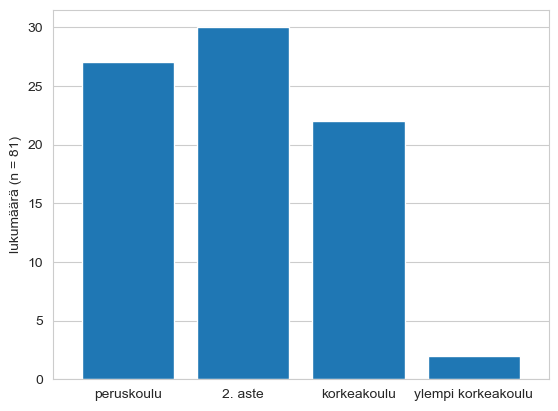

In [5]:
# Pystypylväskaavio frekvenssitaulukon frekvensseistä
df1['f'].plot.bar(width=0.8, rot=0)

# y-akselin otsikko
plt.ylabel(f'lukumäärä (n = {df1["f"].sum()})')

# Kumotaan whitegrid-tyylin sisältämä pystysuuntainen taustaviivoitus
plt.grid(axis='x')

## Frekvenssiprosenttien graafinen esittäminen

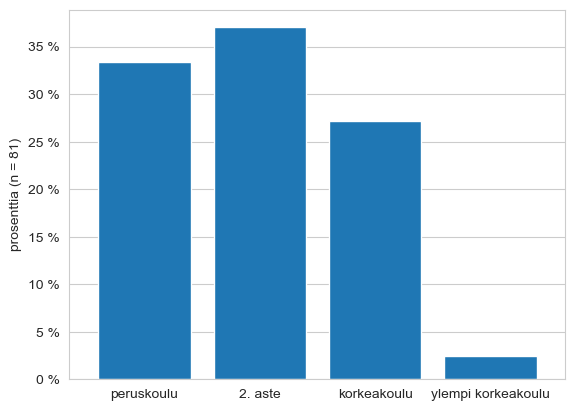

In [6]:
# Kaavio frekvenssitaulukon prosenteista
df1['%'].plot.bar(width=0.8, rot=0)

plt.ylabel(f'prosenttia (n = {df1["f"].sum()})')

# y-akselin lukujen muotoilu prosenteiksi
# gca() (get current axis) viittaa luotuun kaavioon
plt.gca().yaxis.set_major_formatter(ticks)

plt.grid(axis='x')

## Frekvenssit dikotomisille (dummy) muuttujille

Datan muuttujat *työterv*, *lomaosa*, *kuntosa* ja *hieroja* ovat dikotomisia (onko käyttänyt kyseistä etuutta?). Arvo 1 tarkoittaa etuuden käyttöä ja ykkösten summana saadaan käyttäjien lukumäärä.

In [7]:
dikot = ['työterv', 'lomaosa', 'kuntosa', 'hieroja']

# summat dataframeen ja lopuksi järjestäminen lukumäärän mukaan
df2 = df[dikot].sum().to_frame('f').sort_values('f', ascending=False)

# Prosentit lasketaan vastaajien lukumäärästä (datan rivien määrä)
df2['%'] = df2['f']/df.shape[0]*100

df2.style.format(format)

,f,%
työterv,47,57.3 %
hieroja,22,26.8 %
lomaosa,20,24.4 %
kuntosa,9,11.0 %


Text(0, 0.5, 'lukumäärä')

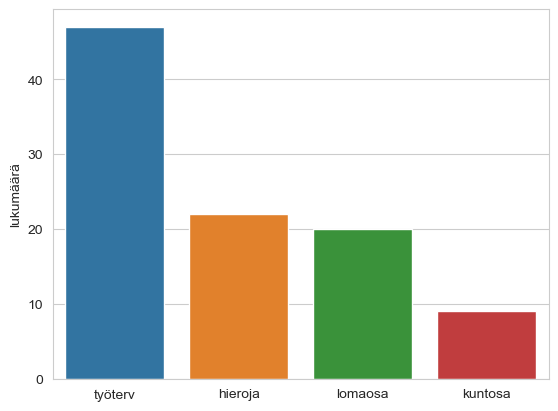

In [8]:
# Muuttujien lista frekvenssien mukaisessa järjestyksessä
list = df[dikot].sum().sort_values(ascending=False).index

# Seaborn kaaviot tehdään suoraan alkuperäisestä datasta, joten edellisen solun taulukkoa ei tarvita
sns.barplot(data=df[list], estimator=sum)

plt.ylabel('lukumäärä')

## Puuttuvat havainnot

Muuttuja *työtov* (tyytyväisyys työtovereihin) mitattiin 5-portaisella asteikolla (1=erittäin tyytymätön, 5=erittäin tyytyväinen). Yhdeltä henkilöltä puuttui vastaus tähän kysymykseen. Kokonaislukutyyppiselle muuttujalla (int) ei sallita puuttuvia arvoja, joten tämä muuttuja on liukulukutyyppinen (float) toisin kuin muut tyytyväisyysmuuttujat. Tämä ei yleensä analysoinnin kannalta aiheuta mitään ongelmia eikä sitä mitenkään erikseen tarvitse huomioida.

Huomiota vaativa ongelma on se, että kukaan ei ollut *erittäin tyytymätön* työtovereihin eli vastausvaihtoehtoa 1 ei ole kukaan valinnut. Se puuttuu myös frekvenssitaulukosta. Olisi kuitenkin hyvä näyttää kyseinen vaihtoehto frekvenssitaulukossa.

Tämä onnistuu vaihtamalla muuttujan tyypiksi **category**.

In [9]:
# Tässä ei näy arvoa 1.0 (erittäin tyytymätön), koska kukaan ei sitä valinnut
df3 = pd.crosstab(df['työtov'], 'f')

df3.columns.name = ''
df3['%'] = df3['f']/df3['f'].sum()*100

df3.style.format(format)

,f,%
työtov,,
2.000000,3,3.7 %
3.000000,16,19.8 %
4.000000,35,43.2 %
5.000000,27,33.3 %


In [10]:
# Teen uuden muuttujan, jonka tyyppi on category
df['työtov_cat'] = pd.Categorical(df['työtov'], categories=[1, 2, 3, 4, 5], ordered=True)

In [11]:
# dropna-parametrin ansiosta myös 'erittäin tyytymätön' tulee frekvenssitaulukkoon mukaan
df4 = pd.crosstab(df['työtov_cat'], 'f', dropna=False)

df4.columns.name = ''
df4.index = tyytyväisyys
df4['%'] = df4['f']/df4['f'].sum()*100

df4.style.format(format)

,f,%
erittäin tyytymätön,0,0.0 %
tyytymätön,3,3.7 %
siltä väliltä,16,19.8 %
tyytyväinen,35,43.2 %
erittäin tyytyväinen,27,33.3 %


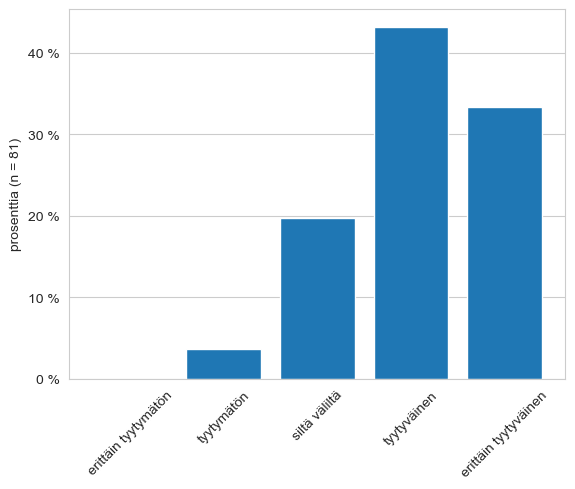

In [12]:
# Kaavio frekvenssitaulukon prosenteista

df4['%'].plot.bar(width=0.8, rot=45)

plt.ylabel(f'prosenttia (n = {df4["f"].sum()})')
plt.gca().yaxis.set_major_formatter(ticks)
plt.grid(axis='x')

## Usean kaavion kuvio

**For**-toistorakennetta käyttäen voin esittää usean muuttujan jakaumat yhdessä kuviossa, joka sisältää monta kaaviota.

Komento `fig, axs = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(12, 3))` luo kuvion, jossa on 5 kaaviota vierekkäin (ncols=5) ja kaavioilla on yhteinen y-akseli (sharey=True). Komento palauttaa sekä kuvion (fig) että sen sisältämien kaavioiden listan (axs).

**Enumerate**-funktio palauttaa sekä tyytyväisyydet-listan muuttujien järjestysnumerot (i) että muuttujien nimet (var). Järjestysnumeroita tarvitaan osoittamaan mihin kaavioon mikäkin muuttuja sijoitetaan (`ax=axs[i]`).

Värikarttoja https://matplotlib.org/stable/tutorials/colors/colormaps.html (palette-parametri).

Text(0, 0.5, 'lukumäärä')

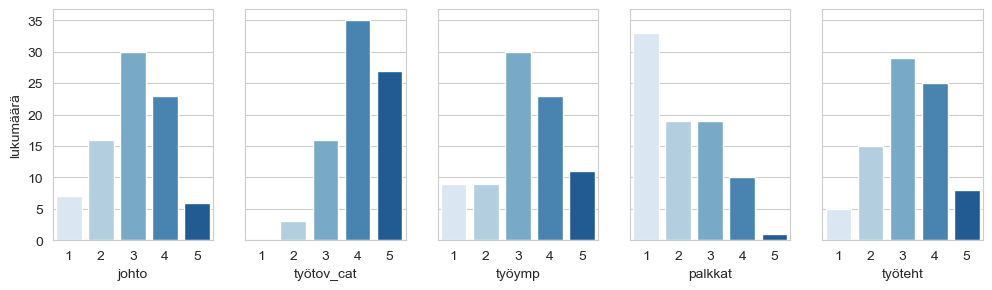

In [13]:
tyytyväisyydet = ['johto', 'työtov_cat', 'työymp', 'palkkat', 'työteht']

fig, axs = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(12, 3))

for i, var in enumerate(tyytyväisyydet):
    sns.countplot(data=df, x=var, ax=axs[i], palette='Blues')
    axs[i].set_ylabel('')

# Otsikko ensimmäisen kaavion y-akselille
axs[0].set_ylabel('lukumäärä')

## Luokiteltu jakauma

Määrällisen muuttujan voin luokitella pandas-kirjaston **cut**-funktiolla. Oletuksena luokat eivät sisällä luokan alarajaa, mutta sisältävät ylärajan.

**Histplot**-funktio tuottaa luokituksen, jossa luokat sisältävät alarajan, mutta eivät ylärajaa.

Jos haluan cut-funktion tuottamien luokkien olevan yhdenmukaisia histogrammin kanssa, käytän cut-funktion yhteydessä parametria `right=False`. Tämänkin jälkeen voi tulla eroa viimeisen luokan ylärajan kohdalla, joka histogrammissa sisältyy luokkaan.

In [14]:
ikäluokat = [19, 29, 39, 49, 59, 69]
df['ikäluokka'] = pd.cut(df['ikä'], bins=ikäluokat, right=False)

df5 = pd.crosstab(df['ikäluokka'], 'f')

df5.columns.name = ''
df5['%'] = df5['f']/df5['f'].sum()*100

df5.style.format(format)

,f,%
ikäluokka,,
"[19, 29)",14,17.1 %
"[29, 39)",30,36.6 %
"[39, 49)",25,30.5 %
"[49, 59)",11,13.4 %
"[59, 69)",2,2.4 %


([<matplotlib.axis.XTick at 0x2320590bca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

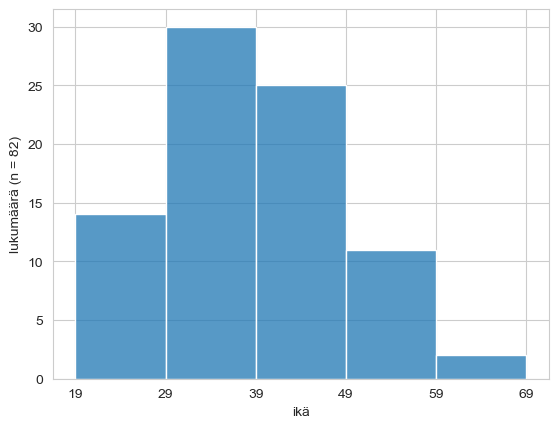

In [15]:
# Histogrammi luokitellun jakauman havainnollistamiseen
sns.histplot(df['ikä'], bins=ikäluokat)

plt.ylabel(f'lukumäärä (n = {df["ikä"].count()})')

# x-akselille luokkien rajakohdat
plt.xticks(ikäluokat)

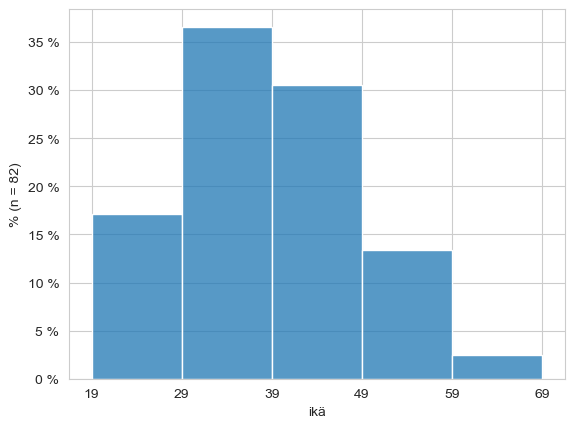

In [16]:
# Prosentit histplot-kaavioon

sns.histplot(df['ikä'], stat='percent', bins=ikäluokat)

plt.xlabel('ikä')
plt.ylabel(f'% (n = {df["ikä"].count()})')
plt.xticks(ikäluokat)
plt.gca().yaxis.set_major_formatter(ticks)

## Tilastolliset tunnusluvut

Tilastolliset tunnusluvut voin laskea **describe**-funktiolla. 

Seabornin **Boxplot** on hyvä tapa havainnollistaa tunnuslukuja (pienin, alaneljännes, mediaani, yläneljännes, suurin).

Usean muuttujan keskiarvojen havainnollistamiseen sopii seabornin **barplot**, joka esittää oletuksena keskiarvot pylväinä ja näyttää myös virhemarginaalit.

In [17]:
# Palkan tunnuslukuja
df['palkka'].describe()

count      82.000000
mean     2563.878049
std       849.350302
min      1521.000000
25%      2027.000000
50%      2320.000000
75%      2808.000000
max      6278.000000
Name: palkka, dtype: float64

<AxesSubplot:xlabel='palkka'>

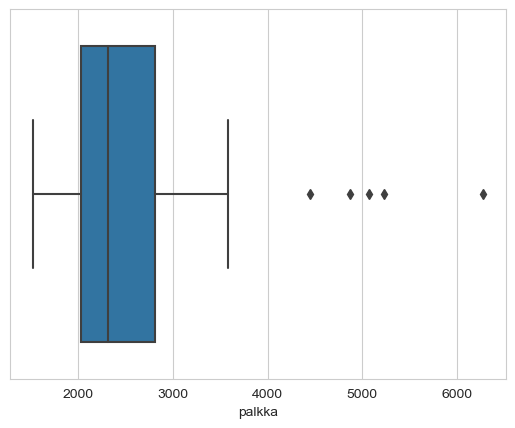

In [18]:
# Boxplot palkalle
sns.boxplot(data=df, x='palkka')

In [19]:
# Tunnuslukuja tyytyväisyyksille
df.loc[:, 'johto':'työteht'].describe()

,johto,työtov,työymp,palkkat,työteht
count,82.000000,81.000000,82.000000,82.000000,82.000000
mean,3.060976,4.061728,3.219512,2.109756,3.195122
std,1.058155,0.826826,1.154961,1.111179,1.047502
min,1.000000,2.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,3.000000,1.000000,3.000000
50%,3.000000,4.000000,3.000000,2.000000,3.000000
75%,4.000000,5.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


Text(0.5, 0, 'tyytyväisyyskeskiarvo (5 = erittäin tyytyväinen)')

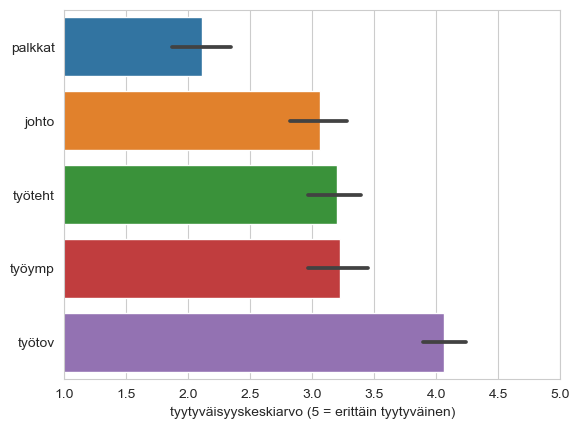

In [20]:
# Tyytyväisyysmuuttujien lista keskiarvon mukaisessa järjestyksessä
list1 = df.loc[:,'johto':'työteht'].mean().sort_values().index

# Keskiarvoja kuvaavat pylväät ja virhemarginaalit
sns.barplot(data=df[list1], orient='h')

# x-akselin skaalaus (pienin arvo 1, suurin arvo 5)
plt.xlim(1, 5)

plt.xlabel('tyytyväisyyskeskiarvo (5 = erittäin tyytyväinen)')

In [21]:
# Avaan vielä toisen datan, jossa asteikolla 0-10 mitattuja mielikuvia
hatco = pd.read_excel('https://taanila.fi/hatco.xlsx')
hatco

,id,Delivery Speed,Price Level,Price Flexibility,Manufacturer Image,Service,Salesforce Image,Product Quality,Satisfaction Level,Firm size,Usage level %,Industry type,Buying situation
0,1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,4.2,0,32,1,1
1,2,1.8,3.0,6.3,6.6,2.5,4.0,8.4,4.3,1,43,0,1
2,3,3.4,5.2,5.7,6.0,4.3,2.7,8.2,5.2,1,48,1,2
3,4,2.7,1.0,7.1,5.9,1.8,2.3,7.8,3.9,1,32,1,1
4,5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,6.8,0,58,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.6,1.6,6.4,5.0,0.7,2.1,8.4,3.4,1,25,1,1
96,97,6.1,0.5,9.2,4.8,3.3,2.8,7.1,5.2,0,60,1,3
97,98,2.0,2.8,5.2,5.0,2.4,2.7,8.4,3.7,1,38,0,1
98,99,3.1,2.2,6.7,6.8,2.6,2.9,8.4,4.3,1,42,0,1


In [22]:
# Pelkästään mielikuvamuuttujat
hatco1 = hatco.loc[:, 'Delivery Speed':'Satisfaction Level'] 

In [23]:
# Tunnuslukuja mielikuva-muuttujille
hatco1.describe()

,Delivery Speed,Price Level,Price Flexibility,Manufacturer Image,Service,Salesforce Image,Product Quality,Satisfaction Level
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.515000,2.364000,7.894000,5.248000,2.916000,2.665000,6.971000,4.771000
std,1.320726,1.195659,1.386502,1.131414,0.751258,0.770855,1.585241,0.855558
min,0.000000,0.200000,5.000000,2.500000,0.700000,1.100000,3.700000,3.200000
25%,2.500000,1.475000,6.700000,4.575000,2.400000,2.200000,5.800000,4.100000
50%,3.400000,2.150000,8.050000,5.000000,3.000000,2.600000,7.150000,4.850000
75%,4.600000,3.225000,9.100000,6.000000,3.425000,3.000000,8.325000,5.400000
max,6.100000,5.400000,10.000000,8.200000,4.600000,4.600000,10.000000,6.800000


(0.0, 10.0)

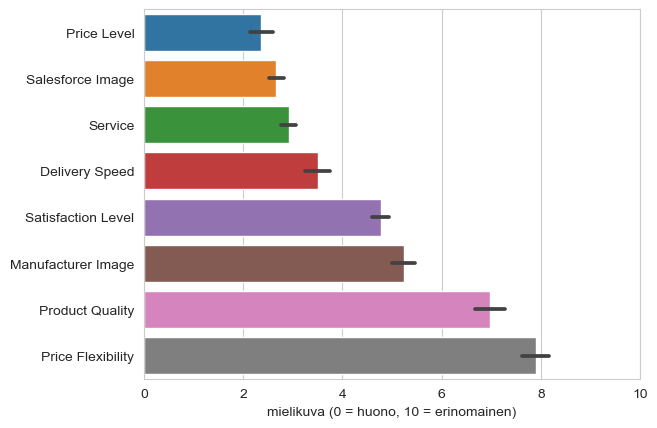

In [24]:
# Mielikuvamuuttujat keskiarvojen mukaisessa järjestyksessä
list2 = hatco1.mean().sort_values().index

# Keskiarvot ja virhemarginaalit
sns.barplot(data=hatco1[list2], orient='h')

plt.xlabel('mielikuva (0 = huono, 10 = erinomainen)')
plt.xlim(0, 10)

(0.0, 10.0)

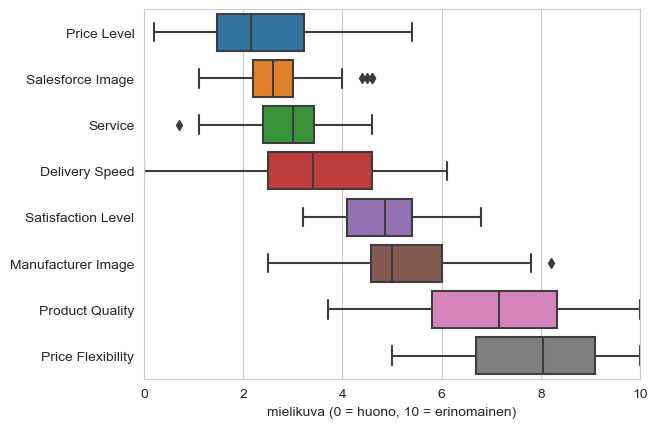

In [25]:
# Boxplot mielikuvamuuttujista
# Boxplot sisältää enemmän informaatiota kuin pelkkien keskiarvojen esittäminen!
sns.boxplot(data=hatco1[list2], orient='h')

plt.xlabel('mielikuva (0 = huono, 10 = erinomainen)')
plt.xlim(0, 10)


## Kaavioiden värit ja koot

Kaavion luonnissa voin määrittää värin **color**-parametrin arvona (toimii myös seaborn-kaavioille). Esimerkiksi tämän muistion ensimmäiseen kaavioon saan pylväille vihreän värin seuraavasti: `df1['f'].plot.bar(width=0.8, rot=0, color='green')`. Reunavärin voin määrittää **edgecolor**-parametrilla.

Värejä: https://matplotlib.org/stable/gallery/color/named_colors.html

Kaavion luonnissa voit määrittää käytettävän värikartan suoraan dataframesta tehdyille kaavioille **cmap**-parametrilla ja seaborn-kaavioille **palette**-parametrilla. Esimerkiksi tämän muistion viimeisessä kaaviossa voin vaihtaa värikartaksi Greens: `sns.boxplot(data=hatco1[list2], orient='h', palette='Greens')`

Värikarttoja: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Suoraan dataframesta tehdyn kaavion koon voin määrittää **figsize**-parametrin arvona. Esimerkiksi `df1['f'].plot.bar(width=0.8, rot=0, figsize=(10, 6))`

Seaborn-kaavion koon voin määrittää luomalla kaaviota ympäröivän kuvion (figure) ennen kaavion luomista. Esimerkiksi `plt.figure(figsize=(10,6))`